<a href="https://colab.research.google.com/github/MimaDalix/Deep-Learning-tensorflow/blob/main/Exo_5_hidden_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Creating data to view and fit 

In [15]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import tensorflow as tf

In [ ]:
X, y = make_moons()
X.shape, y.shape

((100, 2), (100,))

In [ ]:
# Splitting data into training and test set 
X_train = X[:80]
X_test = X[80:]
y_train = y[:80]
y_test = y[80:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 2), (20, 2), (80,), (20,))

## Building the classifier 

In [11]:
# Setting the random seed
tf.random.set_seed(42)

# 1. Create the model 
model = tf.keras.Sequential([
    #tf.keras.layers.Flatten(input_shape=()),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

  
# 3. Fit the model 
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
3/3 [==============================] - 1s 95ms/step - loss: 0.6938 - accuracy: 0.5250 - val_loss: 0.7309 - val_accuracy: 0.4000
Epoch 2/25
3/3 [==============================] - 0s 14ms/step - loss: 0.6885 - accuracy: 0.5250 - val_loss: 0.7245 - val_accuracy: 0.4000
Epoch 3/25
3/3 [==============================] - 0s 14ms/step - loss: 0.6834 - accuracy: 0.5250 - val_loss: 0.7182 - val_accuracy: 0.4000
Epoch 4/25
3/3 [==============================] - 0s 14ms/step - loss: 0.6782 - accuracy: 0.5250 - val_loss: 0.7120 - val_accuracy: 0.4000
Epoch 5/25
3/3 [==============================] - 0s 15ms/step - loss: 0.6735 - accuracy: 0.5375 - val_loss: 0.7058 - val_accuracy: 0.4000
Epoch 6/25
3/3 [==============================] - 0s 16ms/step - loss: 0.6684 - accuracy: 0.5375 - val_loss: 0.6997 - val_accuracy: 0.4000
Epoch 7/25
3/3 [==============================] - 0s 14ms/step - loss: 0.6635 - accuracy: 0.5375 - val_loss: 0.6938 - val_accuracy: 0.4000
Epoch 8/25
3/3 [===========

## Evaluating our classifier

In [13]:
# Evaluating the classifier 
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 26ms/step - loss: 0.6046 - accuracy: 0.4000


[0.6046432256698608, 0.4000000059604645]

## Let's visualize our model's predictions

In [17]:
def plot_decision_boundary(model, X, y):
  '''
  Plots the decision boundary created by a model predicting X
  '''
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()]  # stack 2D arrays together 

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0])> 1:
    print("doing multi-class classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred= np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary 
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha= 0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification


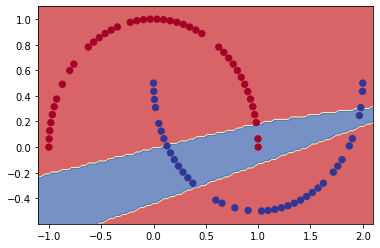

In [18]:
plot_decision_boundary(model, X_train, y_train)

doing binary classification


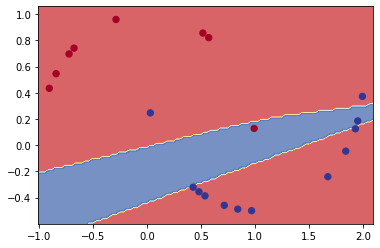

In [19]:
plot_decision_boundary(model, X_test, y_test)

## Normalizing the data 

In [21]:
# Check the min and the max values of our training data
X_train.min(), X_train.max()

(-1.0, 2.0)

In [28]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum 
X_train_norm = X_train / 2.0
X_test_norm = X_test / 2.0

# Check the min and max of the normalized data
X_train_norm.min(), X_train_norm.max()



(-0.5, 1.0)

## Building a model using normalized data

In [31]:
# Setting the random seed
tf.random.set_seed(42)

# 1. Creating the model 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model 
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model 
history_norm = model_2.fit(X_train_norm,
                           y_train,
                           epochs=50,
                           validation_data=(X_test_norm, y_test))

Epoch 1/50
3/3 [==============================] - 1s 83ms/step - loss: 0.6887 - accuracy: 0.5250 - val_loss: 0.7065 - val_accuracy: 0.4000
Epoch 2/50
3/3 [==============================] - 0s 17ms/step - loss: 0.6852 - accuracy: 0.5250 - val_loss: 0.7025 - val_accuracy: 0.4000
Epoch 3/50
3/3 [==============================] - 0s 14ms/step - loss: 0.6817 - accuracy: 0.5250 - val_loss: 0.6986 - val_accuracy: 0.4000
Epoch 4/50
3/3 [==============================] - 0s 14ms/step - loss: 0.6783 - accuracy: 0.5250 - val_loss: 0.6947 - val_accuracy: 0.4000
Epoch 5/50
3/3 [==============================] - 0s 15ms/step - loss: 0.6750 - accuracy: 0.5250 - val_loss: 0.6908 - val_accuracy: 0.4000
Epoch 6/50
3/3 [==============================] - 0s 20ms/step - loss: 0.6716 - accuracy: 0.5375 - val_loss: 0.6871 - val_accuracy: 0.4000
Epoch 7/50
3/3 [==============================] - 0s 15ms/step - loss: 0.6682 - accuracy: 0.5375 - val_loss: 0.6834 - val_accuracy: 0.4000
Epoch 8/50
3/3 [===========

In [32]:
model_2.evaluate(X_test_norm, y_test)

1/1 [==============================] - 0s 97ms/step - loss: 0.5487 - accuracy: 0.9000


[0.5486716032028198, 0.8999999761581421]

doing binary classification


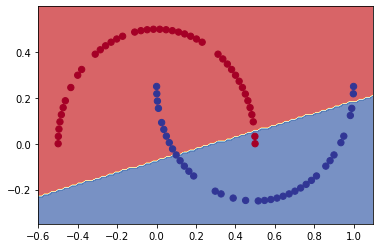

In [33]:
plot_decision_boundary(model_2, X_train_norm, y_train)

doing binary classification


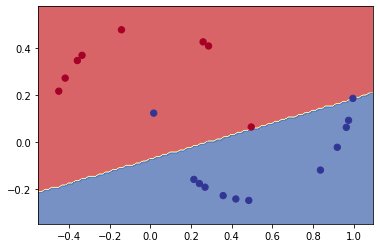

In [34]:
plot_decision_boundary(model_2, X_test_norm, y_test)